### glacier elevatin change statistics.
1. glaciers dhdt mapping for specific glacier.   
2. histogram of the glacier dhdt. 


In [1]:
import geopandas as gpd
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
from utils.scatter_plot import scatter_plot


In [2]:
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_gla_larger1 = 'data/glacier-extent/rgi70/hma_rgi70_larger1km2.gpkg'
path_gla_dhdt = 'data/glacier-height/hugonnet-gla-dset/dhdt_2000_2019/gla_rgi70_dhdt_stats.gpkg'


In [3]:
## read hma and glacier extent
gla_larger1_gdf = gpd.read_file(path_gla_larger1)
gla_dhdt_stats_gdf = gpd.read_file(path_gla_dhdt)
hma_gtng_gdf = gpd.read_file(path_hma_gtng)
hma_subreg_gdf = hma_gtng_gdf[hma_gtng_gdf['full_name'] == 'East Himalaya']


Text(0.5, 1.0, 'Glacier-specific dh/dt (2000-2019) [m/yr]')

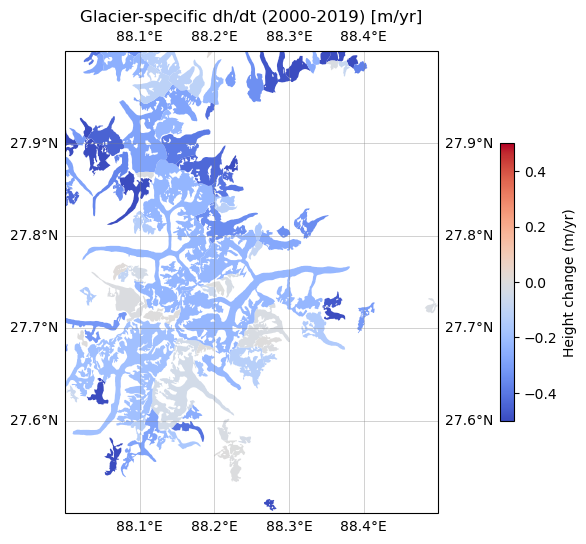

In [4]:
## Plotting the HMA subregion dhdt data
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([88, 88.5, 27.5, 28])
hma_gtng_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5, alpha=0.5)
gla_dhdt_stats_gdf.plot(ax=ax, 
                        column='median', 
                        cmap='coolwarm', 
                        vmin=-0.5, 
                        vmax=0.5, 
                        legend=True, 
                        legend_kwds={'label': "Height change (m/yr)", 'pad': 0.1, 'shrink': 0.6})
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
ax.set_title('Glacier-specific dh/dt (2000-2019) [m/yr]')


Text(0.5, 1.0, 'HMA glacier elevation change for glaciers larger than 1 km2 (2000-2019)')

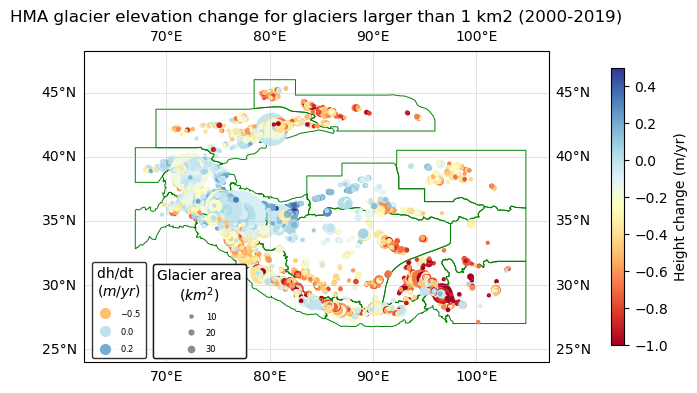

In [5]:
gla_dhdt_stats_centers = gla_dhdt_stats_gdf.geometry.representative_point()
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([62.0, 107.0, 24.0, 46.0])
hma_gtng_gdf.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax_sc = scatter_plot(x=gla_dhdt_stats_centers.x.values, 
                  y=gla_dhdt_stats_centers.y.values, 
                  ax=ax, 
                  size=gla_dhdt_stats_gdf['area_km2'], 
                  color=gla_dhdt_stats_gdf['median'].values, 
                  font_size=6,
                  labels_size = [10, 20, 30], 
                  labels_color = [-0.5, 0, 0.2], 
                  scale_size = 1, 
                  color_range=[-1, 0.5], 
                  bbox_to_anchor_size=(0.14, 0),
                  cmap="RdYlBu")
plt.colorbar(ax_sc.collections[1], ax=ax, pad=0.1, shrink=0.6, label='Height change (m/yr)')
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.set_title('HMA glacier elevation change for glaciers larger than 1 km2 (2000-2019)')
# fig.savefig('figures/glacier-height/hma_gla_larger1_dhdt_2000_2019.png', dpi=200, bbox_inches='tight')


In [6]:
### select glaciers with dh/dt larger than 0.
gla_dhdt_increase = gla_dhdt_stats_gdf[gla_dhdt_stats_gdf['median'] >= 0]
gla_dhdt_increase = gla_dhdt_increase.reset_index()
print(gla_dhdt_increase.shape)


(3893, 8)


Text(0.5, 1.0, 'HMA glacier elevation change for glaciers with increased dhdt (2000-2019)')

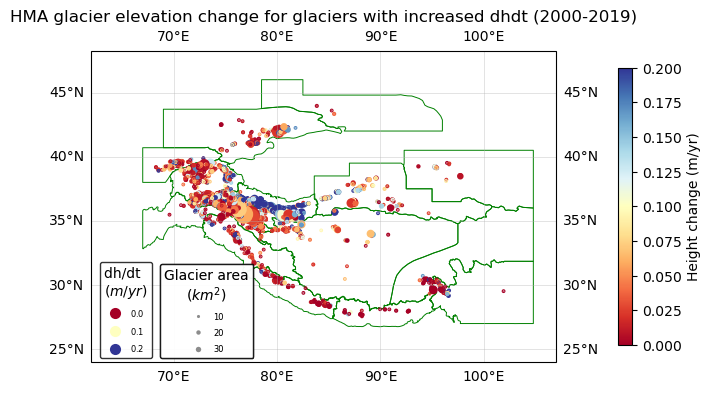

In [7]:
gla_dhdt_increase_centers = gla_dhdt_increase.geometry.representative_point()
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([62.0, 107.0, 24.0, 46.0])
hma_gtng_gdf.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
ax_sc = scatter_plot(x=gla_dhdt_increase_centers.x.values, 
                  y=gla_dhdt_increase_centers.y.values, 
                  ax=ax, 
                  size=gla_dhdt_increase['area_km2'], 
                  color=gla_dhdt_increase['median'].values, 
                  font_size=6,
                  labels_size = [10, 20, 30], 
                  labels_color = [0, 0.1, 0.2], 
                  scale_size = 0.5, 
                  color_range=[0, 0.2], 
                  cmap="RdYlBu")
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
plt.colorbar(ax_sc.collections[1], ax=ax, pad=0.1, shrink=0.6, label='Height change (m/yr)')
ax.set_title('HMA glacier elevation change for glaciers with increased dhdt (2000-2019)')
# fig.savefig('figures/glacier-height/hma_gla_larger1_dhdt_increase_2000_2019.png', dpi=200, bbox_inches='tight')



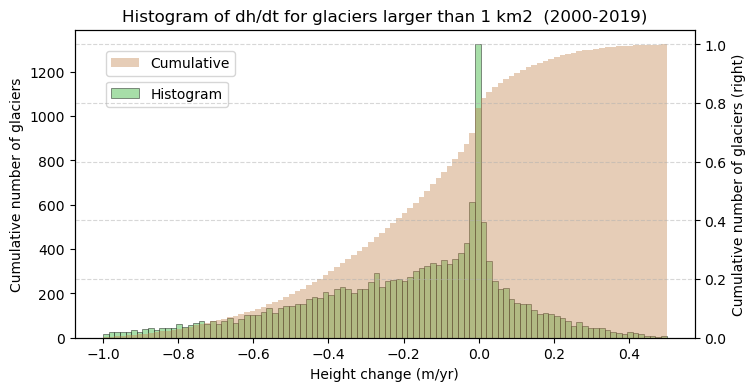

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
gla_dhdt_stats_gdf['median'].hist(ax=ax, 
                                  bins=100, 
                                  range=(-1, 0.5), 
                                  facecolor="#6DC96F", 
                                  alpha=0.6, 
                                  edgecolor='black', 
                                  linewidth=0.5)
ax2 = ax.twinx()
gla_dhdt_stats_gdf['median'].hist(ax=ax2, 
                                  bins=100, 
                                  range=(-1, 0.5), 
                                  cumulative=True, 
                                  density=True,
                                  facecolor="#C2844D", 
                                  alpha=0.4, 
                                  edgecolor='none', 
                                  linewidth=0.5)

ax.set_xlabel('Height change (m/yr)')
ax.set_ylabel('Number of glaciers')
ax.set_ylabel('Cumulative number of glaciers')  ## 
ax2.set_ylabel('Cumulative number of glaciers (right)')
ax.set_title('Histogram of dh/dt for glaciers larger than 1 km2  (2000-2019)')
ax.grid(False)
ax2.grid(linestyle='--', alpha=0.5)
ax.legend(['Histogram', 'Cumulative'], loc=(0.05, 0.75))
ax2.legend(['Cumulative'], loc=(0.05, 0.85))
# fig.savefig('figures/glacier-height/hma_gla_larger1_dhdt_hist_2000_2019.png', dpi=200, bbox_inches='tight')
